In [2]:
import numpy as np
import pandas as pd

### Fraud detection with SVC and logistic regression classifiers

In [9]:
# checks how is the distribution in data set of fraud/not fraud labeled data points
def fraud_percentage():
    from sklearn.model_selection import train_test_split
    from sklearn.model_selection import train_test_split
    
    df = pd.read_csv('assets/fraud_data.csv')
    precentage_fraud = df['Class'].value_counts(normalize=True)[1]
    
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    
    print('percentage of fraud labeled data points: {0:.3f}'.format(precentage_fraud))
    
    
    
    
    return precentage_fraud

fraud_percentage()

percentage of fraud labeled data points: 0.016


0.016410823768035772

In [4]:
# splitting dtat set in traing and test sets
from sklearn.model_selection import train_test_split

df = pd.read_csv('assets/fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Training dummy classifier and finding metrics to contrast with SVC trained classifier


In [6]:
def dummy_classifier():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import recall_score
    from sklearn.metrics import accuracy_score

    dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
    y_dummy_predictions = dummy_majority.predict(X_test)
    acc_score = accuracy_score(y_test, y_dummy_predictions)
    recall_score = recall_score(y_test, y_dummy_predictions)
    
    print('acc. score of dummy classifer: {0:.2f}'.format(acc_score))
    print('recall score of dummy classifer: {0:.2f}'.format(recall_score))
    return (acc_score, recall_score)

dummy_classifier()

acc. score of dummy classifer: 0.99
recall score of dummy classifer: 0.00


(0.9852507374631269, 0.0)

### Training SVC classifier with standard parameters and finding out metrics


In [10]:
def svc_standard_parameters():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score

    svm = SVC().fit(X_train, y_train)
    y_svm_predictions = svm.predict(X_test)
    acc_score = accuracy_score(y_test, y_svm_predictions)
    recall_score = recall_score(y_test, y_svm_predictions)
    precision_score = precision_score(y_test, y_svm_predictions)
    
    print('acc. score of std svc classifer: {0:.2f}'.format(acc_score))
    print('recall score of std svc classifer: {0:.2f}'.format(recall_score))
    print('precision score of std svc classifer: {0:.2f}'.format(precision_score))
    
    return (acc_score, recall_score, precision_score)
    
svc_standard_parameters()

acc. score of std svc classifer: 0.99
recall score of std svc classifer: 0.35
precision score of std svc classifer: 0.93


(0.9900442477876106, 0.35, 0.9333333333333333)

### Training parametrized SVC classifier with standard with  `{'C': 1e9, 'gamma': 1e-07}`and finding out metrics in confusion matrix


In [12]:
def parametrized_svc_classifier():
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC
   
    # set svc 
    svm = SVC(C = 1e9, gamma = 1e-07).fit(X_train, y_train)
    y_scores = svm.decision_function(X_test)
    
    #Set threshold = -220
    y_score = np.where(y_scores > -220, 1, 0)
    conf_matrix = confusion_matrix(y_test, y_score)
    
    print(conf_matrix)
    return conf_matrix

parametrized_svc_classifier()

[[5320   24]
 [  14   66]]


array([[5320,   24],
       [  14,   66]], dtype=int64)

### Training a logisitic regression classifier and drawing precision-recall curve and roc curve


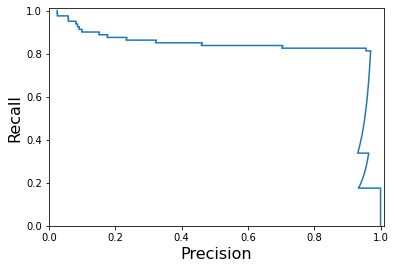

Recall = 0.82 when precision = 0.75


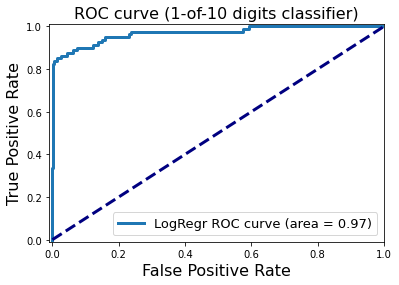

True positive rate = 0.94 when false positive rate = 0.16


(0.82, 0.94)

In [13]:
def find_closest(arr, val):
    idx = np.abs(arr - val).argmin()
    return arr[idx], idx

def plot_precision_recal_curve(precision, recall, thresholds):
    import matplotlib.pyplot as plt
    
    plt.figure()
    plt.xlim([0.0, 1.01])
    plt.ylim([0.0, 1.01])
    plt.plot(precision, recall, label='Precision-Recall Curve')
    #plt.plot(prec, rec, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
    plt.xlabel('Precision', fontsize=16)
    plt.ylabel('Recall', fontsize=16)
    #plt.axes().set_aspect('equal')
    plt.show()
    
    prec, rec = find_closest(precision, 0.75)
    print('Recall = {:0.2f} when precision = {:0.2f}'.format(recall[rec], prec))
    
    

def plot_roc_curve(fpr_lr, tpr_lr):
    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    
    roc_auc_lr = auc(fpr_lr, tpr_lr)
    
    plt.figure()
    plt.xlim([-0.01, 1.00])
    plt.ylim([-0.01, 1.01])
    plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.legend(loc='lower right', fontsize=13)
    plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
    #plt.axes().set_aspect('equal')grid
    plt.show()
    
    temp = find_closest(fpr_lr, 0.16)
    print('True positive rate = {:0.2f} when false positive rate = {:0.2f}'.format(tpr_lr[temp[1]], temp[0]))
    
def plotting():
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve
    from sklearn.metrics import roc_curve, auc
    
    y_proba_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train).decision_function(X_test)
    
    # plotting precision_recal_curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lr)
    plot_precision_recal_curve(precision, recall, thresholds)
    
    # roc curve
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    plot_roc_curve(fpr_lr, tpr_lr)
    
    return (0.82, 0.94)

    
plotting()

### grid search over `'penalty': ['l1', 'l2']` and `'C':[0.01, 0.1, 1, 10]` using recall for scoring and the default 3-fold cross validation


In [15]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [18]:
def grid_search():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import recall_score
    import sklearn.metrics
    from tabulate import tabulate
    
    #y_proba_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train).decision_function(X_test)
    grid_values = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
    # metric to optimize over grid parameters: recall
    grid_clf_rec = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid = grid_values, scoring = 'recall')
    grid_clf_rec.fit(X, y)
    y_decision_fn_scores_rec = grid_clf_rec.decision_function(X_test)

    mean_test_scores = grid_clf_rec.cv_results_['mean_test_score']
    mean_test_scores = mean_test_scores.reshape(4, 2)
    
    data = [["0.01", mean_test_scores[0][0], mean_test_scores[0][1]], 
            ["0.1", mean_test_scores[1][0], mean_test_scores[1][1]], 
            ["1", mean_test_scores[2][0], mean_test_scores[2][1]], 
            ["10", mean_test_scores[3][0], mean_test_scores[3][1]]]
    
    
    col_names = ["C", "l1", 'l2']
    
    print(tabulate(data, headers=col_names))


grid_search()

    C        l1        l2
-----  --------  --------
 0.01  0.71072   0.76964
 0.1   0.792097  0.800548
 1     0.800548  0.800548
10     0.794953  0.79777
